In [1]:
from __future__ import print_function
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init stereo aruco detector scene builder

In [2]:
from pkg.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None, base_link="base_link")
# s_builder.reset_reference_coord(ref_name="floor")

In [3]:
from pkg.planning.filtering.reach_filter import ReachTrainer
from pkg.controller.combined_robot import *

In [4]:
rtrain = ReachTrainer(scene_builder=s_builder)

## collect and train

connection_list
[False]


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


added robot collision boundaries
0 / 1000 (0 / 332923 s): current success ratio = 0.0
100 / 1000 (24 / 248 s): current success ratio = 0.277227722772
200 / 1000 (51 / 256 s): current success ratio = 0.248756218905
300 / 1000 (78 / 261 s): current success ratio = 0.232558139535
400 / 1000 (105 / 262 s): current success ratio = 0.226932668329
500 / 1000 (129 / 259 s): current success ratio = 0.235528942116
600 / 1000 (151 / 253 s): current success ratio = 0.256239600666
700 / 1000 (176 / 252 s): current success ratio = 0.261055634807
800 / 1000 (202 / 252 s): current success ratio = 0.259675405743
900 / 1000 (226 / 251 s): current success ratio = 0.261931187569
connection_list
[False]
added robot collision boundaries


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


0 / 500 (0 / 166429 s): current success ratio = 0.0
100 / 500 (24 / 123 s): current success ratio = 0.287128712871
200 / 500 (51 / 127 s): current success ratio = 0.253731343284
300 / 500 (75 / 125 s): current success ratio = 0.265780730897
400 / 500 (101 / 126 s): current success ratio = 0.259351620948
trainset: 	2.0 ms/1 = 2.029 ms (2.029/2.029)
testset: 	1.0 ms/1 = 0.987 ms (0.987/0.987)

trainning accuracy = 99.8 %
test accuracy = 96.2 %
trainning success accuracy = 99.25 %
trainning failure accuracy = 100.0 %
test success accuracy = 93.13 %
test failure accuracy = 97.29 %


/home/rnb/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


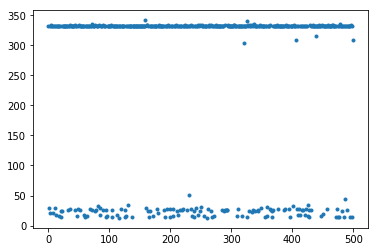

In [5]:
rtrain.collect_and_learn(RobotType.indy7, "indy0_tcp", 
                         TRAIN_COUNT=1000, TEST_COUNT=500, save_data=True, save_model=True, timeout=0.3)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

connection_list
[False]
added robot collision boundaries
0 / 1000 (0 / 534075 s): current success ratio = 0.0
100 / 1000 (45 / 456 s): current success ratio = 0.207920792079
200 / 1000 (93 / 465 s): current success ratio = 0.174129353234
300 / 1000 (137 / 456 s): current success ratio = 0.186046511628
400 / 1000 (185 / 464 s): current success ratio = 0.167082294264
500 / 1000 (231 / 462 s): current success ratio = 0.171656686627
600 / 1000 (278 / 464 s): current success ratio = 0.164725457571
700 / 1000 (326 / 466 s): current success ratio = 0.159771754636
800 / 1000 (372 / 466 s): current success ratio = 0.161048689139
900 / 1000 (418 / 465 s): current success ratio = 0.163152053274
connection_list
[False]
added robot collision boundaries
0 / 500 (0 / 266880 s): current success ratio = 0.0
100 / 500 (46 / 234 s): current success ratio = 0.148514851485
200 / 500 (94 / 236 s): current success ratio = 0.144278606965
300 / 500 (136 / 227 s): current success ratio = 0.182724252492
400 / 50

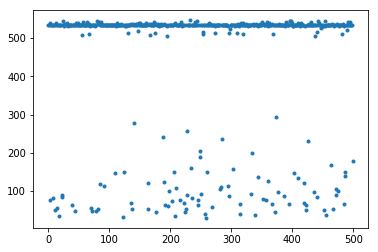

In [6]:
rtrain.collect_and_learn(RobotType.panda, "panda0_hand", 
                         TRAIN_COUNT=1000, TEST_COUNT=500, save_data=True, save_model=True, timeout=0.5)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

## load and train

In [16]:
rtrain.load_and_learn(RobotType.indy7) # , C_svm=100)
rtrain.load_and_learn(RobotType.panda) # , C_svm=50)

trainset: 	2.0 ms/1 = 1.85 ms (1.85/1.85)
testset: 	1.0 ms/1 = 1.019 ms (1.019/1.019)

trainning accuracy = 99.8 %
test accuracy = 96.6 %
trainning success accuracy = 99.25 %
trainning failure accuracy = 100.0 %
test success accuracy = 93.89 %
test failure accuracy = 97.56 %
trainset: 	3.0 ms/1 = 2.506 ms (2.506/2.506)
testset: 	1.0 ms/1 = 1.313 ms (1.313/1.313)

trainning accuracy = 98.2 %
test accuracy = 95.4 %
trainning success accuracy = 96.39 %
trainning failure accuracy = 98.56 %
test success accuracy = 89.01 %
test failure accuracy = 96.82 %


## load and test

In [10]:
rtrain.load_and_test(RobotType.indy7)
rtrain.load_and_test(RobotType.panda)

trainset: 	2.0 ms/1 = 1.887 ms (1.887/1.887)
testset: 	1.0 ms/1 = 1.025 ms (1.025/1.025)

trainning accuracy = 99.8 %
test accuracy = 96.6 %
trainning success accuracy = 99.25 %
trainning failure accuracy = 100.0 %
test success accuracy = 93.89 %
test failure accuracy = 97.56 %
trainset: 	2.0 ms/1 = 2.337 ms (2.337/2.337)
testset: 	1.0 ms/1 = 1.177 ms (1.177/1.177)

trainning accuracy = 99.1 %
test accuracy = 95.2 %
trainning success accuracy = 99.4 %
trainning failure accuracy = 99.04 %
test success accuracy = 90.11 %
test failure accuracy = 96.33 %


## Disconnect stereo

In [ ]:
stereo.disconnnect()